In [1]:
# GENERAL THINGS FOR COMPUTING AND PLOTTING
import pandas as pd
import numpy as np
import os, sys, time
from datetime import datetime
from datetime import timedelta
import scipy as sp
import itertools

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")

# ibl specific things
import datajoint as dj
from ibl_pipeline import reference, subject, action, acquisition, data, behavior
from ibl_pipeline.analyses import behavior as behavioral_analyses

# get data through ONE, not DJ
from oneibl.one import ONE
one = ONE()

Connecting anneurai@datajoint.internationalbrainlab.org:3306
Connected to https://alyx.internationalbrainlab.org as anneu
Connected to https://alyx.internationalbrainlab.org as anneu


In [2]:
# get all ephysCW sessions - avoid laserEphysChoiceWorld
sess = acquisition.Session & 'task_protocol LIKE "_iblrig_tasks_ephysChoiceWorld%"'
b = sess * behavior.TrialSet.Trial
b = b.proj('session_lab', 'task_protocol', 'trial_stim_prob_left', 'session_uuid')
df = b.fetch(format='frame').reset_index()
sorted(df.task_protocol.unique())

['_iblrig_tasks_ephysChoiceWorld4.1.3',
 '_iblrig_tasks_ephysChoiceWorld5.2.5',
 '_iblrig_tasks_ephysChoiceWorld5.2.9',
 '_iblrig_tasks_ephysChoiceWorld5.3.0',
 '_iblrig_tasks_ephysChoiceWorld6.0.3',
 '_iblrig_tasks_ephysChoiceWorld6.0.6',
 '_iblrig_tasks_ephysChoiceWorld6.1.1',
 '_iblrig_tasks_ephysChoiceWorld6.1.2',
 '_iblrig_tasks_ephysChoiceWorld6.1.3',
 '_iblrig_tasks_ephysChoiceWorld6.2.0',
 '_iblrig_tasks_ephysChoiceWorld6.2.1',
 '_iblrig_tasks_ephysChoiceWorld6.2.3',
 '_iblrig_tasks_ephysChoiceWorld6.2.4',
 '_iblrig_tasks_ephysChoiceWorld6.2.5',
 '_iblrig_tasks_ephysChoiceWorld6.4.0']

In [3]:
# count the number of trials in each sequence
def run_length(l):
    answer = []
    for key, iter in itertools.groupby(l):
        answer.append((key, len(list(iter))))
    return answer

block_lenghts = []
for name, group in df.groupby(['session_lab', 'task_protocol', 'session_start_time', 'session_uuid']):
    run_lengths = pd.DataFrame(run_length(group.trial_stim_prob_left))
    tmp_df = pd.DataFrame({'prob_left':run_lengths[0].values, 'length':run_lengths[1].values})
    tmp_df['session_lab'] = name[0]
    tmp_df['task_protocol'] = name[1]
    tmp_df['session_start_time'] = name[2]
    tmp_df['session_uuid'] = name[3]
    block_lenghts.append(tmp_df)
    

In [4]:
df2 = pd.concat(block_lenghts)

# abbreviate the task protocols
df2['task'] = df2['task_protocol'].str.replace('_iblrig_tasks_ephysChoiceWorld', 'ephysCW')
df2['task'] = df2.task.str[:-2]

Text(0.5, 0.98, 'All ephysCW probabilityLeft from DataJoint')

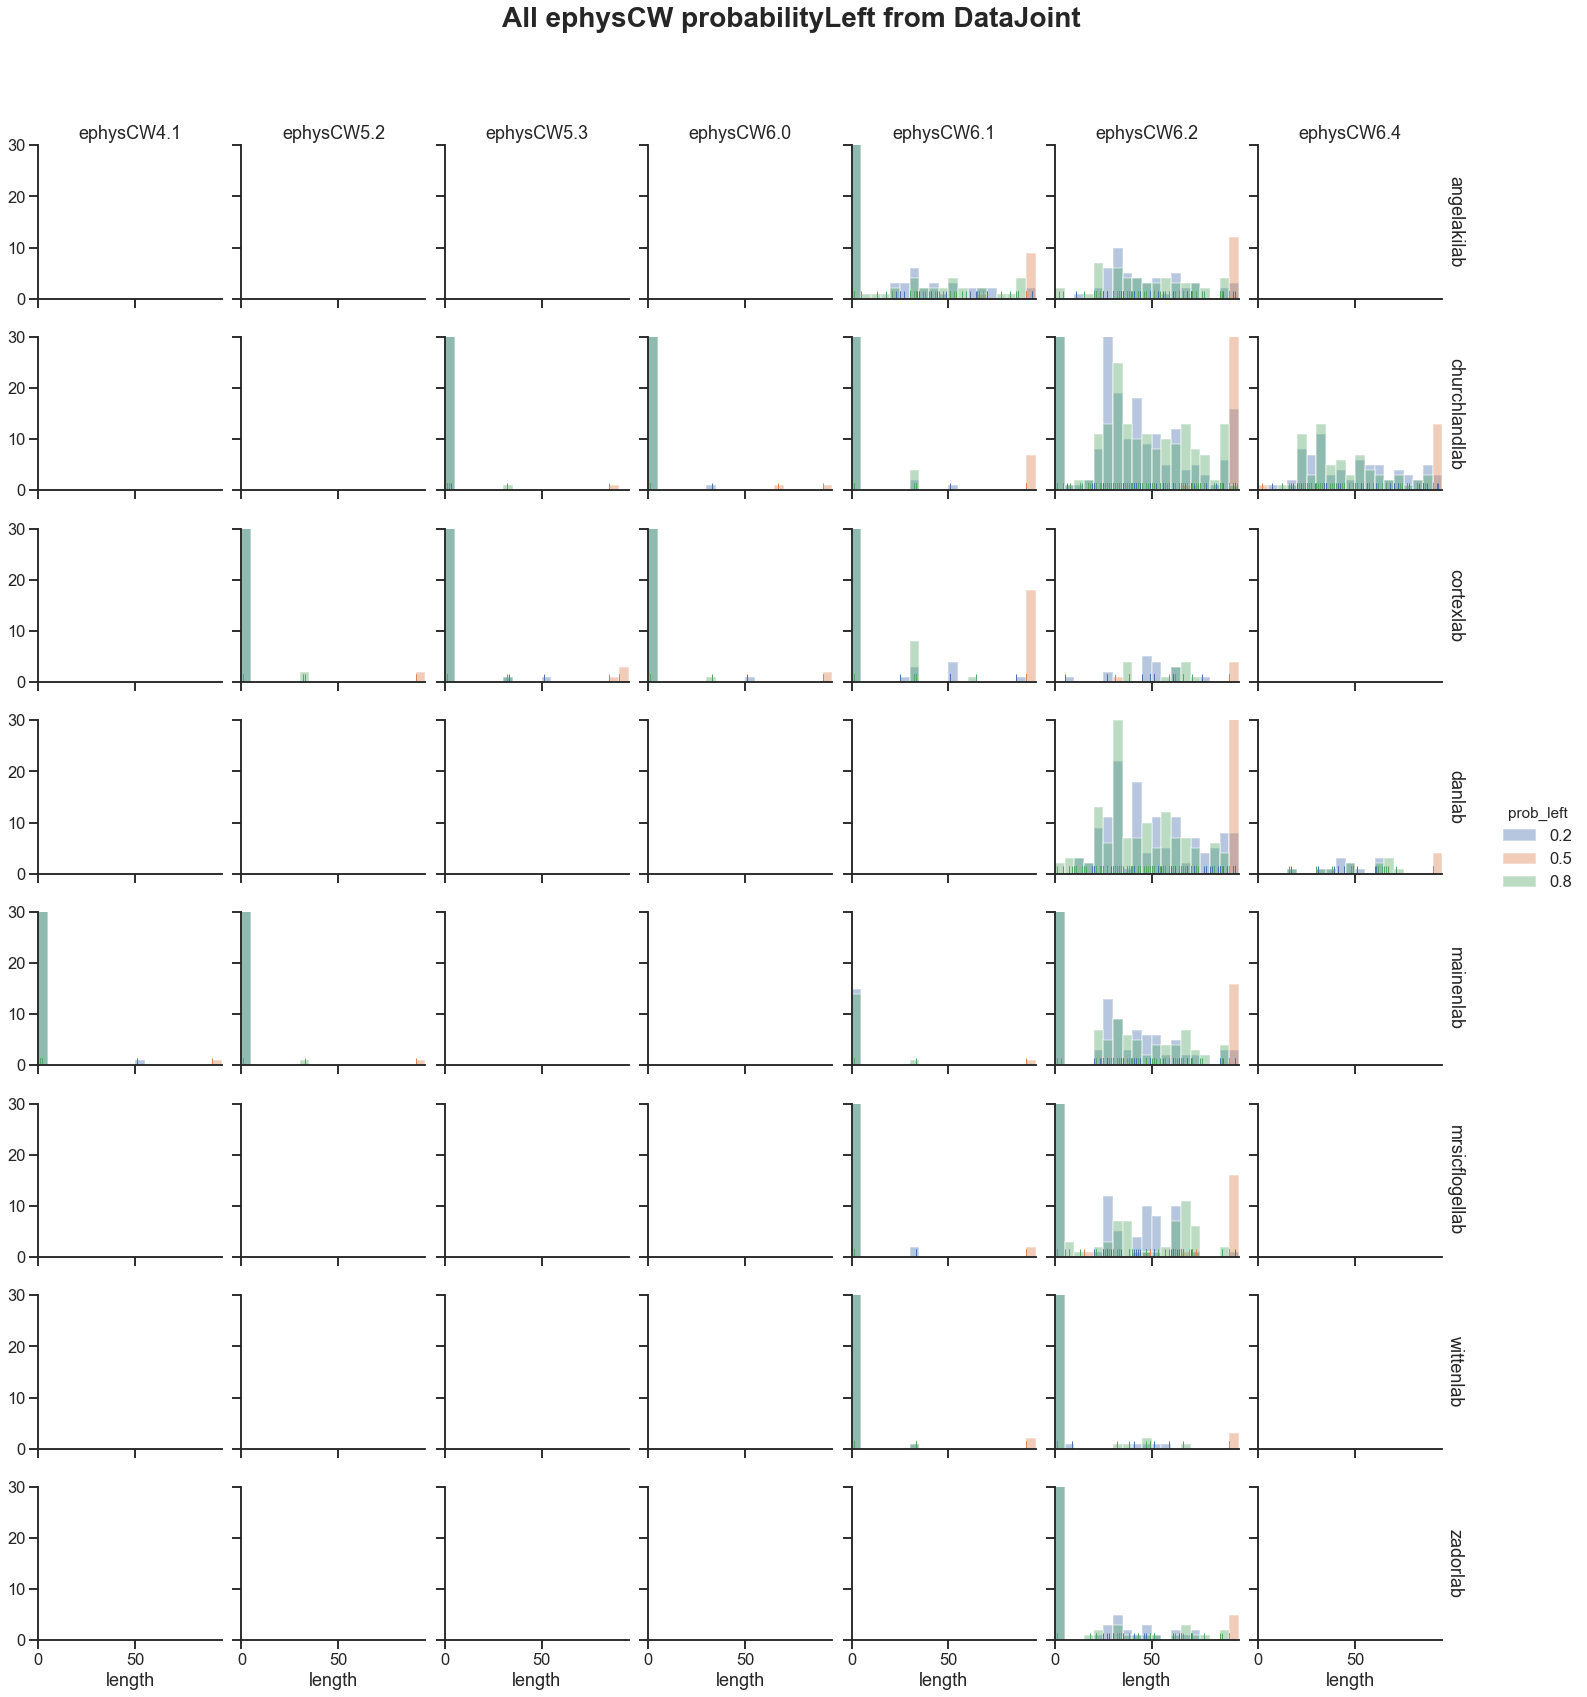

In [5]:
## make a big overview
g = sns.FacetGrid(df2, row="session_lab", col='task', 
                  col_order=sorted(df2.task.unique()), hue="prob_left", ylim=[0,30], xlim=[0,95], margin_titles=True)
g.map(sns.distplot, "length", rug=True, kde=False, hist=True, bins=np.arange(0, 100, 5)).add_legend()
[plt.setp(ax.texts, text="") for ax in g.axes.flat] # to clean margin titles on the right
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('All ephysCW probabilityLeft from DataJoint', fontsize=28, weight='bold')

In [6]:
eids = ['01864d6f-31e8-49c9-aadd-2e5021ea0ee7',
 '6713a4a7-faed-4df2-acab-ee4e63326f8d',
 'dd0faa76-4f49-428c-9507-6de7382a5d9e',
 '266a0360-ea0a-4580-8f6a-fe5bad9ed17c',
 '56956777-dca5-468c-87cb-78150432cc57',
 'b52182e7-39f6-4914-9717-136db589706e',
 '2d5f6d81-38c4-4bdc-ac3c-302ea4d5f46e',
 '1538493d-226a-46f7-b428-59ce5f43f0f9',
 '3ce452b3-57b4-40c9-885d-1b814036e936',
 '931a70ae-90ee-448e-bedb-9d41f3eda647',
 '02fbb6da-3034-47d6-a61b-7d06c796a830',
 '097ba865-f424-49a3-96fb-863506fac3e0',
 '097afc11-4214-4879-bd7a-643a4d16396e',
 '115d264b-1939-4b8e-9d17-4ed8dfc4fadd',
 '202128f9-02af-4c6c-b6ce-25740e6ba8cd',
 'cb2ad999-a6cb-42ff-bf71-1774c57e5308',
 '12dc8b34-b18e-4cdd-90a9-da134a9be79c',
 'c8e60637-de79-4334-8daf-d35f18070c29',
 '74bae29c-f614-4abe-8066-c4d83d7da143',
 '56d38157-bb5a-4561-ab5c-3df05a5d6e28',
 '6364ff7f-6471-415a-ab9e-632a12052690',
 '7be8fec4-406b-4e74-8548-d2885dcc3d5e',
 '9931191e-8056-4adc-a410-a4a93487423f',
 'af74b29d-a671-4c22-a5e8-1e3d27e362f3',
 'ded7c877-49cf-46ad-b726-741f1cf34cef',
 '0cbeae00-e229-4b7d-bdcc-1b0569d7e0c3',
 'fb7b21c9-b50e-4145-9254-a91a50d656ca',
 'ecb5520d-1358-434c-95ec-93687ecd1396',
 'ab583ab8-08bd-4ebc-a0b8-5d40af551068',
 'd42bb88e-add2-414d-a60a-a3efd66acd2a',
 '79de526f-aed6-4106-8c26-5dfdfa50ce86',
 'c90cdfa0-2945-4f68-8351-cb964c258725',
 '572a95d1-39ca-42e1-8424-5c9ffcb2df87',
 '8435e122-c0a4-4bea-a322-e08e8038478f',
 'bc9ea019-b560-4435-ab53-780d9276f15c',
 'da926936-9383-463a-8722-fd89e50b6941',
 '38d95489-2e82-412a-8c1a-c5377b5f1555',
 'c607c5da-534e-4f30-97b3-b1d3e904e9fd',
 '849c9acb-8223-4e09-8cb1-95004b452baf',
 '9ac2be3b-6e0b-4f49-b8bf-82344d9f5e67',
 'f64128ad-e201-4cbc-a839-85565804a89b',
 '1120797f-c2b0-4c09-b6ea-2555d69cb7ee',
 '034e726f-b35f-41e0-8d6c-a22cc32391fb',
 'dfd8e7df-dc51-4589-b6ca-7baccfeb94b4',
 'fa704052-147e-46f6-b190-a65b837e605e',
 '46794e05-3f6a-4d35-afb3-9165091a5a74',
 'ff4187b5-4176-4e39-8894-53a24b7cf36b',
 '465c44bd-2e67-4112-977b-36e1ac7e3f8c',
 'e49d8ee7-24b9-416a-9d04-9be33b655f40',
 'f8d5c8b0-b931-4151-b86c-c471e2e80e5d',
 '5b266a92-49d9-4376-a9f8-46a25b1c9655',
 '4153bd83-2168-4bd4-a15c-f7e82f3f73fb',
 'c6d5cea7-e1c4-48e1-8898-78e039fabf2b',
 '9f1b915b-d437-4426-8dcc-1124538069e8',
 '2199306e-488a-40ab-93cb-2d2264775578',
 '7bee9f09-a238-42cf-b499-f51f765c6ded',
 '36280321-555b-446d-9b7d-c2e17991e090',
 '1c213d82-32c3-49f7-92ca-06e28907e1b4',
 '741979ce-3f10-443a-8526-2275620c8473',
 'cf43dbb1-6992-40ec-a5f9-e8e838d0f643',
 '85dc2ebd-8aaf-46b0-9284-a197aee8b16f',
 '5386aba9-9b97-4557-abcd-abc2da66b863',
 '83e77b4b-dfa0-4af9-968b-7ea0c7a0c7e4',
 '4b00df29-3769-43be-bb40-128b1cba6d35',
 'd2f5a130-b981-4546-8858-c94ae1da75ff',
 '720a3fe6-5dfc-4a23-84f0-2f0b08e10ec2',
 '57b5ae8f-d446-4161-b439-b191c5e3e77b',
 '37e96d0b-5b4b-4c6e-9b29-7edbdc94bbd0',
 'a71175be-d1fd-47a3-aa93-b830ea3634a1',
 '57fd2325-67f4-4d45-9907-29e77d3043d7',
 '371a8256-3a13-44fd-86de-0971409d4891',
 '4b45eaac-d139-432d-8ae3-a88b8cfe90d7',
 'd33baf74-263c-4b37-a0d0-b79dcb80a764',
 '259927fd-7563-4b03-bc5d-17b4d0fa7a55',
 '510b1a50-825d-44ce-86f6-9678f5396e02',
 '193fe7a8-4eb5-4f3e-815a-0c45864ddd77']


df2['session_uuid_str'] = [str(eid) for eid in df2['session_uuid'].values]
df3 = df2[df2['session_uuid_str'].isin(eids)]
df3

prob_left  length  session_lab                        task_protocol  \
0         0.5      90  angelakilab  _iblrig_tasks_ephysChoiceWorld6.2.5   
1         0.2      33  angelakilab  _iblrig_tasks_ephysChoiceWorld6.2.5   
2         0.8      86  angelakilab  _iblrig_tasks_ephysChoiceWorld6.2.5   
3         0.2      25  angelakilab  _iblrig_tasks_ephysChoiceWorld6.2.5   
4         0.8      96  angelakilab  _iblrig_tasks_ephysChoiceWorld6.2.5   
..        ...     ...          ...                                  ...   
1         0.2      51    wittenlab  _iblrig_tasks_ephysChoiceWorld6.2.5   
2         0.8      66    wittenlab  _iblrig_tasks_ephysChoiceWorld6.2.5   
3         0.2      49    wittenlab  _iblrig_tasks_ephysChoiceWorld6.2.5   
4         0.8      38    wittenlab  _iblrig_tasks_ephysChoiceWorld6.2.5   
5         0.2      59    wittenlab  _iblrig_tasks_ephysChoiceWorld6.2.5   

    session_start_time                          session_uuid        task  \
0  2020-02-13 10:58:33  371a8256-3a13-44fd-86de-0971409d4891  ephysCW6.2   
1  2020-02-13 10:58:33  371a8256-3a13-44fd-86de-0971409d4891  ephysCW6.2   
2  2020-02-13 10:58:33  371a8256-3a13-44fd-86de-0971409d4891  ephysCW6.2   
3  2020-02-13 10:58:33  371a8256-3a13-44fd-86de-0971409d4891  ephysCW6.2   
4  2020-02-13 10:58:33  371a8256-3a13-44fd-86de-0971409d4891  ephysCW6.2   
..                 ...                                   ...         ...   
1  2019-12-11 15:24:31  4153bd83-2168-4bd4-a15c-f7e82f3f73fb  ephysCW6.2   
2  2019-12-11 15:24:31  4153bd83-2168-4bd4-a15c-f7e82f3f73fb  ephysCW6.2   
3  2019-12-11 15:24:31  4153bd83-2168-4bd4-a15c-f7e82f3f73fb  ephysCW6.2   
4  2019-12-11 15:24:31  4153bd83-2168-4bd4-a15c-f7e82f3f73fb  ephysCW6.2   
5  2019-12-11 15:24:31  4153bd83-2168-4bd4-a15c-f7e82f3f73fb  ephysCW6.2   

                        session_uuid_str  
0   371a8256-3a13-44fd-86de-0971409d4891  
1   371a8256-3a13-44fd-86de-0971409d4891  
2   371a8256-3a13-44fd-86de-0971409d4891  
3   371a8256-3a13-44fd-86de-0971409d4891  
4   371a8256-3a13-44fd-86de-0971409d4891  
..                                   ...  
1   4153bd83-2168-4bd4-a15c-f7e82f3f73fb  
2   4153bd83-2168-4bd4-a15c-f7e82f3f73fb  
3   4153bd83-2168-4bd4-a15c-f7e82f3f73fb  
4   4153bd83-2168-4bd4-a15c-f7e82f3f73fb  
5   4153bd83-2168-4bd4-a15c-f7e82f3f73fb  

[790 rows x 8 columns]

Text(0.5, 0.98, 'Only reingested sessions from DataJoint')

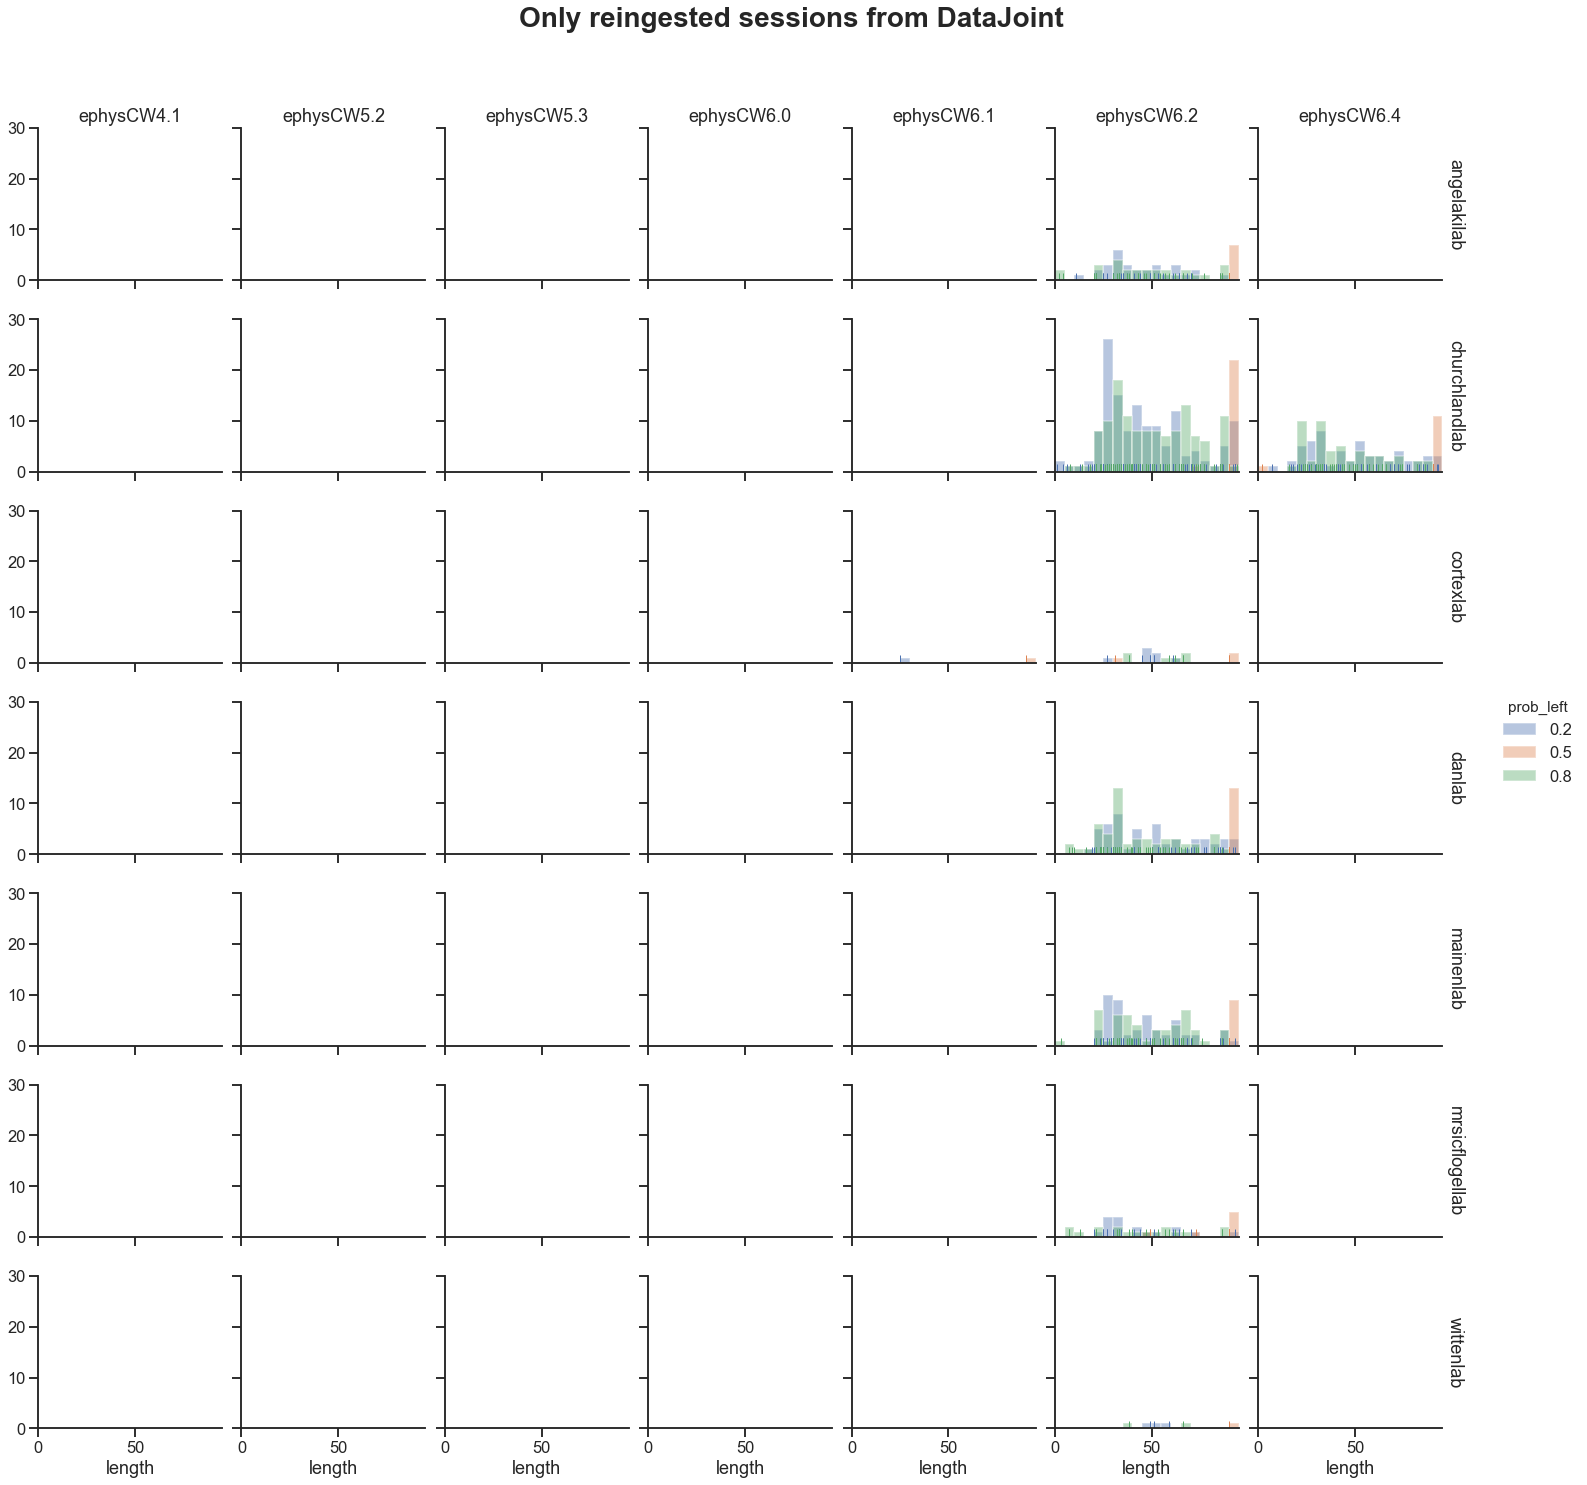

In [7]:
## make a big overview
# see https://int-brain-lab.slack.com/archives/CB13FQFK4/p1583958060097700
g = sns.FacetGrid(df3, row="session_lab", col='task', 
                  col_order=sorted(df2.task.unique()), hue="prob_left", ylim=[0,30], xlim=[0,95], margin_titles=True)
g.map(sns.distplot, "length", rug=True, kde=False, hist=True, bins=np.arange(0, 100, 5)).add_legend()
[plt.setp(ax.texts, text="") for ax in g.axes.flat] # to clean margin titles on the right
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Only reingested sessions from DataJoint', fontsize=28, weight='bold')

## check the psychfuncs per block for those sessions


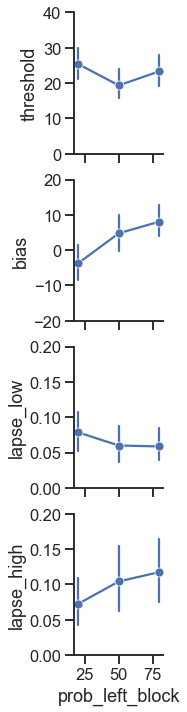

In [10]:
# only those sessions with OKd eids
from uuid import UUID
sess = acquisition.Session & [dict(session_uuid=UUID(eid)) for eid in eids]
psychres = behavioral_analyses.PsychResultsBlock * sess
psychres = psychres.proj('bias', 'threshold', 'lapse_low', 'lapse_high')
psychres = psychres.fetch(format='frame').reset_index()

g = sns.PairGrid(psychres, x_vars='prob_left_block', 
                 y_vars=['threshold', 'bias', 'lapse_low', 'lapse_high'])
g.map(sns.lineplot, err_style='bars', marker='o')

ylims = [[0, 40], [-20, 20], [0, 0.2], [0, 0.2]]
for ax, yl in zip(g.axes.flat, ylims):
    ax.set_ylim(yl)

4.619711444428382
1.731635597782298e-05


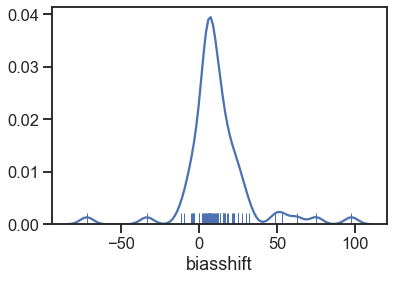

In [51]:
# scatterplothist
psychres_split = pd.pivot_table(psychres, values='bias',
                       index=['subject_uuid', 'session_start_time'],
                       columns=['prob_left_block']).reset_index()
psychres_split['biasshift'] = psychres_split[80] - psychres_split[20]

#plt.hist(psychres_split['biasshift'])
sns.distplot(psychres_split['biasshift'], kde=True, hist=False, rug=True)

import scipy as sp
t, pval = sp.stats.ttest_rel(psychres_split[80], psychres_split[20], nan_policy='omit')
print(t)
print(pval)

## now redo with data from ONE

In [17]:
# get all ephysCW sessions
sessions = sess.proj('session_uuid', 'session_lab', 'task_protocol', 'session_start_time').fetch(format='frame').reset_index()
eids = [str(eid) for eid in sessions['session_uuid'].values]  # cast to strings
len(eids)

297

In [18]:
block_lenghts = []
for ex, eid in enumerate(eids):
    
    # print(eid)
    try:# get session details
        prob_left = one.load(eid, dataset_types='trials.probabilityLeft', keep_uuid=True, clobber=False)
        run_lengths = pd.DataFrame(run_length(prob_left[0]))

        # put in dict with session info
        tmp_df = pd.DataFrame({'prob_left':run_lengths[0].values, 'length':run_lengths[1].values})
    
        tmp_df['session_lab'] = sessions.iloc[ex].session_lab
        tmp_df['task_protocol'] = sessions.iloc[ex].task_protocol
        tmp_df['session_start_time'] = sessions.iloc[ex].session_start_time
        block_lenghts.append(tmp_df)
    except:
        print(eid)
    
# grab together
df2 = pd.concat(block_lenghts)

# abbreviate the task protocols
df2['task'] = df2['task_protocol'].str.replace('_iblrig_tasks_ephysChoiceWorld', 'ephysCW')
df2['task'] = df2.task.str[:-2]
sorted(df2.task.unique())

2020-03-18 11:51:41.236 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: a578c67d-87a9-49ca-ba56-a9e55d2f36b5


a578c67d-87a9-49ca-ba56-a9e55d2f36b5


2020-03-18 11:51:41.597 ERROR    [webclient.py:215] https://alyx.internationalbrainlab.org/sessions/275aecf0-6bb4-4408-beba-364340b2e615
2020-03-18 11:51:41.600 ERROR    [webclient.py:216] {"detail":"Not found."}


275aecf0-6bb4-4408-beba-364340b2e615


2020-03-18 11:51:41.994 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: fc28066d-e317-442d-9d7b-57f72972aa26


fc28066d-e317-442d-9d7b-57f72972aa26
Downloading: /Users/urai/Data/FlatIron/cortexlab/Subjects/KS004/2019-09-25/001/alf/_ibl_trials.probabilityLeft.e3a05c2b-d214-4220-bc68-1d6594b29324.npy Bytes: 1544
Downloading: /Users/urai/Data/FlatIron/cortexlab/Subjects/KS004/2019-09-27/001/alf/_ibl_trials.probabilityLeft.6c82b333-224a-43fc-9ec7-16ec764aa299.npy Bytes: 1768


2020-03-18 11:51:47.117 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: b7998d33-ad2c-4acf-a1ca-5624411e2118


b7998d33-ad2c-4acf-a1ca-5624411e2118


2020-03-18 11:51:55.39 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: ddca4739-f356-4eff-a5c5-05c15c7c0780


ddca4739-f356-4eff-a5c5-05c15c7c0780


2020-03-18 11:52:26.950 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 3c0393b0-b46f-4ff0-a5bf-6a92d4f94c09


3c0393b0-b46f-4ff0-a5bf-6a92d4f94c09


2020-03-18 11:52:27.351 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: b09a1957-1416-40ee-b468-27e4d51820d6


b09a1957-1416-40ee-b468-27e4d51820d6


2020-03-18 11:52:27.740 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: c1fc4aac-4123-49e4-a05c-ee06deac7b5d


c1fc4aac-4123-49e4-a05c-ee06deac7b5d


2020-03-18 11:52:28.136 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 5adc748c-0cb1-49a9-90bd-f444e77423ba


5adc748c-0cb1-49a9-90bd-f444e77423ba


2020-03-18 11:52:28.522 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 14a13191-aced-4c9d-a3c3-8d5916e11679


14a13191-aced-4c9d-a3c3-8d5916e11679


2020-03-18 11:52:28.917 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: e3142ce8-8608-4e20-8c9a-aca8b0f15fd4


e3142ce8-8608-4e20-8c9a-aca8b0f15fd4
Downloading: /Users/urai/Data/FlatIron/cortexlab/Subjects/KS014/2019-12-03/001/alf/_ibl_trials.probabilityLeft.ac7f0374-84d2-4231-a8ce-6542670e850e.npy Bytes: 4376
Downloading: /Users/urai/Data/FlatIron/cortexlab/Subjects/KS014/2019-12-04/001/alf/_ibl_trials.probabilityLeft.f1f4bb81-1664-487e-abd0-87ff90bbea48.npy Bytes: 2760
Downloading: /Users/urai/Data/FlatIron/cortexlab/Subjects/KS014/2019-12-05/001/alf/_ibl_trials.probabilityLeft.64f83321-7b61-4ca4-8094-ed7ef2a19a91.npy Bytes: 5632


2020-03-18 11:52:35.195 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 8966cc7a-72ea-4abc-acbe-8da9aa94c9b2


8966cc7a-72ea-4abc-acbe-8da9aa94c9b2


2020-03-18 11:52:45.373 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 2c2aef1a-c497-4d94-a3f2-22d5883d2d36


2c2aef1a-c497-4d94-a3f2-22d5883d2d36


2020-03-18 11:52:45.770 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: ee567f69-65c9-44d0-9ee0-6349ecd56473


ee567f69-65c9-44d0-9ee0-6349ecd56473


2020-03-18 11:53:00.795 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: ec050f81-8c30-42ab-80fd-d5f0249a7698


ec050f81-8c30-42ab-80fd-d5f0249a7698


2020-03-18 11:53:01.170 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 7c5b6918-b106-4cfe-8159-3867380327e3


7c5b6918-b106-4cfe-8159-3867380327e3


2020-03-18 11:53:01.560 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: a1fba153-900b-4930-80c5-5e39096469b7


a1fba153-900b-4930-80c5-5e39096469b7


2020-03-18 11:53:01.946 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: d49d8190-fc0b-4207-81ef-21368e5ff675


d49d8190-fc0b-4207-81ef-21368e5ff675


2020-03-18 11:53:02.316 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 411cc498-24cb-402e-b3f8-41463b863a6f


411cc498-24cb-402e-b3f8-41463b863a6f
Downloading: /Users/urai/Data/FlatIron/cortexlab/Subjects/KS016/2019-12-04/001/alf/_ibl_trials.probabilityLeft.22cd79f6-9d4e-43a3-803c-b630ebdd710e.npy Bytes: 3592
Downloading: /Users/urai/Data/FlatIron/cortexlab/Subjects/KS016/2019-12-05/001/alf/_ibl_trials.probabilityLeft.ea1178ff-888e-4d8b-a1e4-d47c246c35d9.npy Bytes: 3688


2020-03-18 11:53:15.622 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 3df1f2ea-7ee0-416b-98cd-175f0bcb4656


3df1f2ea-7ee0-416b-98cd-175f0bcb4656


2020-03-18 11:53:16.26 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 2e788fcc-ba2a-4886-a0bb-366360baa141


2e788fcc-ba2a-4886-a0bb-366360baa141


2020-03-18 11:53:16.424 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 7c6078fd-d2cf-4f9a-9cff-fda7c6600f1f


7c6078fd-d2cf-4f9a-9cff-fda7c6600f1f


2020-03-18 11:53:16.816 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 63e850ac-dae1-4576-8f41-43190fe12983


63e850ac-dae1-4576-8f41-43190fe12983


2020-03-18 11:53:17.206 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 1ba5bfae-ac10-4d3c-bf54-7d1082439302


1ba5bfae-ac10-4d3c-bf54-7d1082439302


2020-03-18 11:53:17.595 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: dc9d5336-5fba-4bbd-b69b-f33f4be15a7f


dc9d5336-5fba-4bbd-b69b-f33f4be15a7f


2020-03-18 11:53:17.987 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: e9620e9a-688a-45da-ba6e-33fce6753729


e9620e9a-688a-45da-ba6e-33fce6753729


2020-03-18 11:53:18.377 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 29efbac7-ac05-4771-83b9-05f9eea54601


29efbac7-ac05-4771-83b9-05f9eea54601


2020-03-18 11:53:18.767 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 2e3f6228-da45-4d6d-8d93-03c08a321384


2e3f6228-da45-4d6d-8d93-03c08a321384


2020-03-18 11:53:33.283 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: ba092e80-ca88-4bdf-bbc4-00ee4931df6a


ba092e80-ca88-4bdf-bbc4-00ee4931df6a


2020-03-18 11:53:39.269 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 52c2a3fd-34f0-4e14-bd9c-f16445da1a4b


52c2a3fd-34f0-4e14-bd9c-f16445da1a4b


2020-03-18 11:53:52.247 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: eceb9d00-af2e-4fcd-9882-a205edf443e9


eceb9d00-af2e-4fcd-9882-a205edf443e9


2020-03-18 11:53:52.634 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 00f67a3d-39f5-4879-8a38-9e451d7ece6e


00f67a3d-39f5-4879-8a38-9e451d7ece6e


2020-03-18 11:53:53.22 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 56067350-a264-4a3e-aa37-380f5e0a329a


56067350-a264-4a3e-aa37-380f5e0a329a


2020-03-18 11:53:53.422 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 01860f0d-156b-46bb-8638-56578225c3eb


01860f0d-156b-46bb-8638-56578225c3eb


2020-03-18 11:53:53.813 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 7dea6837-47e5-407c-b694-ce52bef1b3b7


7dea6837-47e5-407c-b694-ce52bef1b3b7


2020-03-18 11:53:54.204 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 6ced0d4d-ba88-4735-a32a-bfe37d6e2e7d


6ced0d4d-ba88-4735-a32a-bfe37d6e2e7d


2020-03-18 11:53:54.600 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: c777867f-39b1-4f7d-8c4c-72585d27f2cd


c777867f-39b1-4f7d-8c4c-72585d27f2cd


2020-03-18 11:53:54.995 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: cfe9af31-f77d-4925-af72-d8557ba9ab3b


cfe9af31-f77d-4925-af72-d8557ba9ab3b


2020-03-18 11:53:55.409 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 4458289c-1935-4209-84c3-2e6a80eb45d5


4458289c-1935-4209-84c3-2e6a80eb45d5


2020-03-18 11:54:02.222 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 173eeb7a-3019-46ed-9c94-2c2be33f0ae4


173eeb7a-3019-46ed-9c94-2c2be33f0ae4
Downloading: /Users/urai/Data/FlatIron/cortexlab/Subjects/KS020/2020-02-05/001/alf/_ibl_trials.probabilityLeft.9197e1d1-b59d-4d8b-b0d6-df8257634931.npy Bytes: 5288
Downloading: /Users/urai/Data/FlatIron/cortexlab/Subjects/KS020/2020-02-06/001/alf/_ibl_trials.probabilityLeft.9b214e5e-b8e9-4e0c-9e8a-002232d4e2fa.npy Bytes: 3504
Downloading: /Users/urai/Data/FlatIron/cortexlab/Subjects/KS020/2020-02-07/001/alf/_ibl_trials.probabilityLeft.d38d8056-cd1d-420e-8456-42c1cf15c87e.npy Bytes: 2840


2020-03-18 11:54:09.864 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: f03833bc-09ba-4681-85fe-cbf4cbb3b72d


f03833bc-09ba-4681-85fe-cbf4cbb3b72d


2020-03-18 11:54:10.356 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: e429f004-5c8e-4798-9a9d-6cb560885b42


e429f004-5c8e-4798-9a9d-6cb560885b42


2020-03-18 11:54:10.751 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 4992f19e-aa68-42a8-bf07-6642216dfc01


4992f19e-aa68-42a8-bf07-6642216dfc01


2020-03-18 11:54:16.975 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: fb053e3d-4ca5-447f-a2ca-fedb93138864


fb053e3d-4ca5-447f-a2ca-fedb93138864


2020-03-18 11:54:17.363 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 9bfa5f05-2fde-43f9-aca2-64376b7f5ec2


9bfa5f05-2fde-43f9-aca2-64376b7f5ec2


2020-03-18 11:54:17.766 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 7e86c0dd-4de2-4052-bf81-9e57684ccb59


7e86c0dd-4de2-4052-bf81-9e57684ccb59


2020-03-18 11:54:24.404 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: a74cc3b6-76ea-46d9-9801-a17c86ae485a


a74cc3b6-76ea-46d9-9801-a17c86ae485a


2020-03-18 11:54:34.980 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 5999ecbd-803e-4d24-bc1d-54ff42b16fd0


5999ecbd-803e-4d24-bc1d-54ff42b16fd0


2020-03-18 11:54:41.522 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: d119b389-c40d-4e7c-8a07-0c7f35edef43


d119b389-c40d-4e7c-8a07-0c7f35edef43


2020-03-18 11:54:47.509 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 942e51dd-4aa6-4db1-8cc9-87769c78a7e8


942e51dd-4aa6-4db1-8cc9-87769c78a7e8


2020-03-18 11:54:47.892 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 77fa9451-9b9b-4c48-8e57-87de1ec22cac


77fa9451-9b9b-4c48-8e57-87de1ec22cac


2020-03-18 11:55:04.963 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 1e5d1394-99f5-4a78-886e-a48f8b3ad0cf


1e5d1394-99f5-4a78-886e-a48f8b3ad0cf


2020-03-18 11:55:05.354 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: ee45f168-6f0e-4535-8824-19e8367bf274


ee45f168-6f0e-4535-8824-19e8367bf274


2020-03-18 11:55:12.35 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: fdd926a5-fe2c-4a15-90b6-ec5dfd0569a2


fdd926a5-fe2c-4a15-90b6-ec5dfd0569a2


2020-03-18 11:55:12.434 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 51fdc38a-8729-4b34-81d1-2ada3dd23e2e


51fdc38a-8729-4b34-81d1-2ada3dd23e2e


2020-03-18 11:55:12.835 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 544f38f8-3da3-4094-8d48-7a76aa2dcefa


544f38f8-3da3-4094-8d48-7a76aa2dcefa


2020-03-18 11:55:13.239 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 638b50a5-5981-440e-a56a-d087686de73b


638b50a5-5981-440e-a56a-d087686de73b


2020-03-18 11:55:13.631 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 96179c05-d2af-46e0-b562-eb58f8fd7bb7


96179c05-d2af-46e0-b562-eb58f8fd7bb7


2020-03-18 11:55:26.281 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 9ee12372-7945-4cae-a222-97fcc883d014


9ee12372-7945-4cae-a222-97fcc883d014


2020-03-18 11:55:26.812 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 441f1b7e-05fd-43fd-a9a3-0845097cce87


441f1b7e-05fd-43fd-a9a3-0845097cce87


2020-03-18 11:55:36.336 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 6ef27a5b-7be9-4fc0-bc67-2368305906fb


6ef27a5b-7be9-4fc0-bc67-2368305906fb


2020-03-18 11:55:36.734 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: fac00dc6-9c61-4de2-b456-a9eb21b60318


fac00dc6-9c61-4de2-b456-a9eb21b60318


2020-03-18 11:55:37.132 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 2fe8aa16-faab-49e3-8e13-aceb0b095a30


2fe8aa16-faab-49e3-8e13-aceb0b095a30


2020-03-18 11:55:37.531 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: ed997f98-424b-4f1d-a736-2d1eb0f35dbb


ed997f98-424b-4f1d-a736-2d1eb0f35dbb


2020-03-18 11:55:37.936 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 81958127-baf9-4e68-95a0-9c1ddfb61667


81958127-baf9-4e68-95a0-9c1ddfb61667


2020-03-18 11:55:46.218 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 819fa142-bc09-4a7c-89e1-6f389d74c19b


819fa142-bc09-4a7c-89e1-6f389d74c19b


2020-03-18 11:55:54.988 ERROR    [webclient.py:215] https://alyx.internationalbrainlab.org/sessions/efd55a09-7171-4310-a000-71cf96d4b8f7
2020-03-18 11:55:54.992 ERROR    [webclient.py:216] {"detail":"Not found."}


efd55a09-7171-4310-a000-71cf96d4b8f7


2020-03-18 11:55:55.346 ERROR    [webclient.py:215] https://alyx.internationalbrainlab.org/sessions/398c7804-6c30-4d41-831a-55cdf671c088
2020-03-18 11:55:55.350 ERROR    [webclient.py:216] {"detail":"Not found."}


398c7804-6c30-4d41-831a-55cdf671c088


2020-03-18 11:56:02.367 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: b1c968ad-4874-468d-b2e4-5ffa9b9964e9


b1c968ad-4874-468d-b2e4-5ffa9b9964e9


2020-03-18 11:56:05.245 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 0c2f24d9-5184-43e6-97dc-17b31cb8cee9


0c2f24d9-5184-43e6-97dc-17b31cb8cee9


2020-03-18 11:56:20.212 WARNING  [one.py:331] dataset trials.probabilityLeft not found for session: 5703b15c-ecb0-447f-ba87-a450da7f5cd1


5703b15c-ecb0-447f-ba87-a450da7f5cd1


['ephysCW5.2',
 'ephysCW5.3',
 'ephysCW6.0',
 'ephysCW6.1',
 'ephysCW6.2',
 'ephysCW6.4']

Text(0.5, 0.98, 'All ephysCW probabilityLeft from ONE')

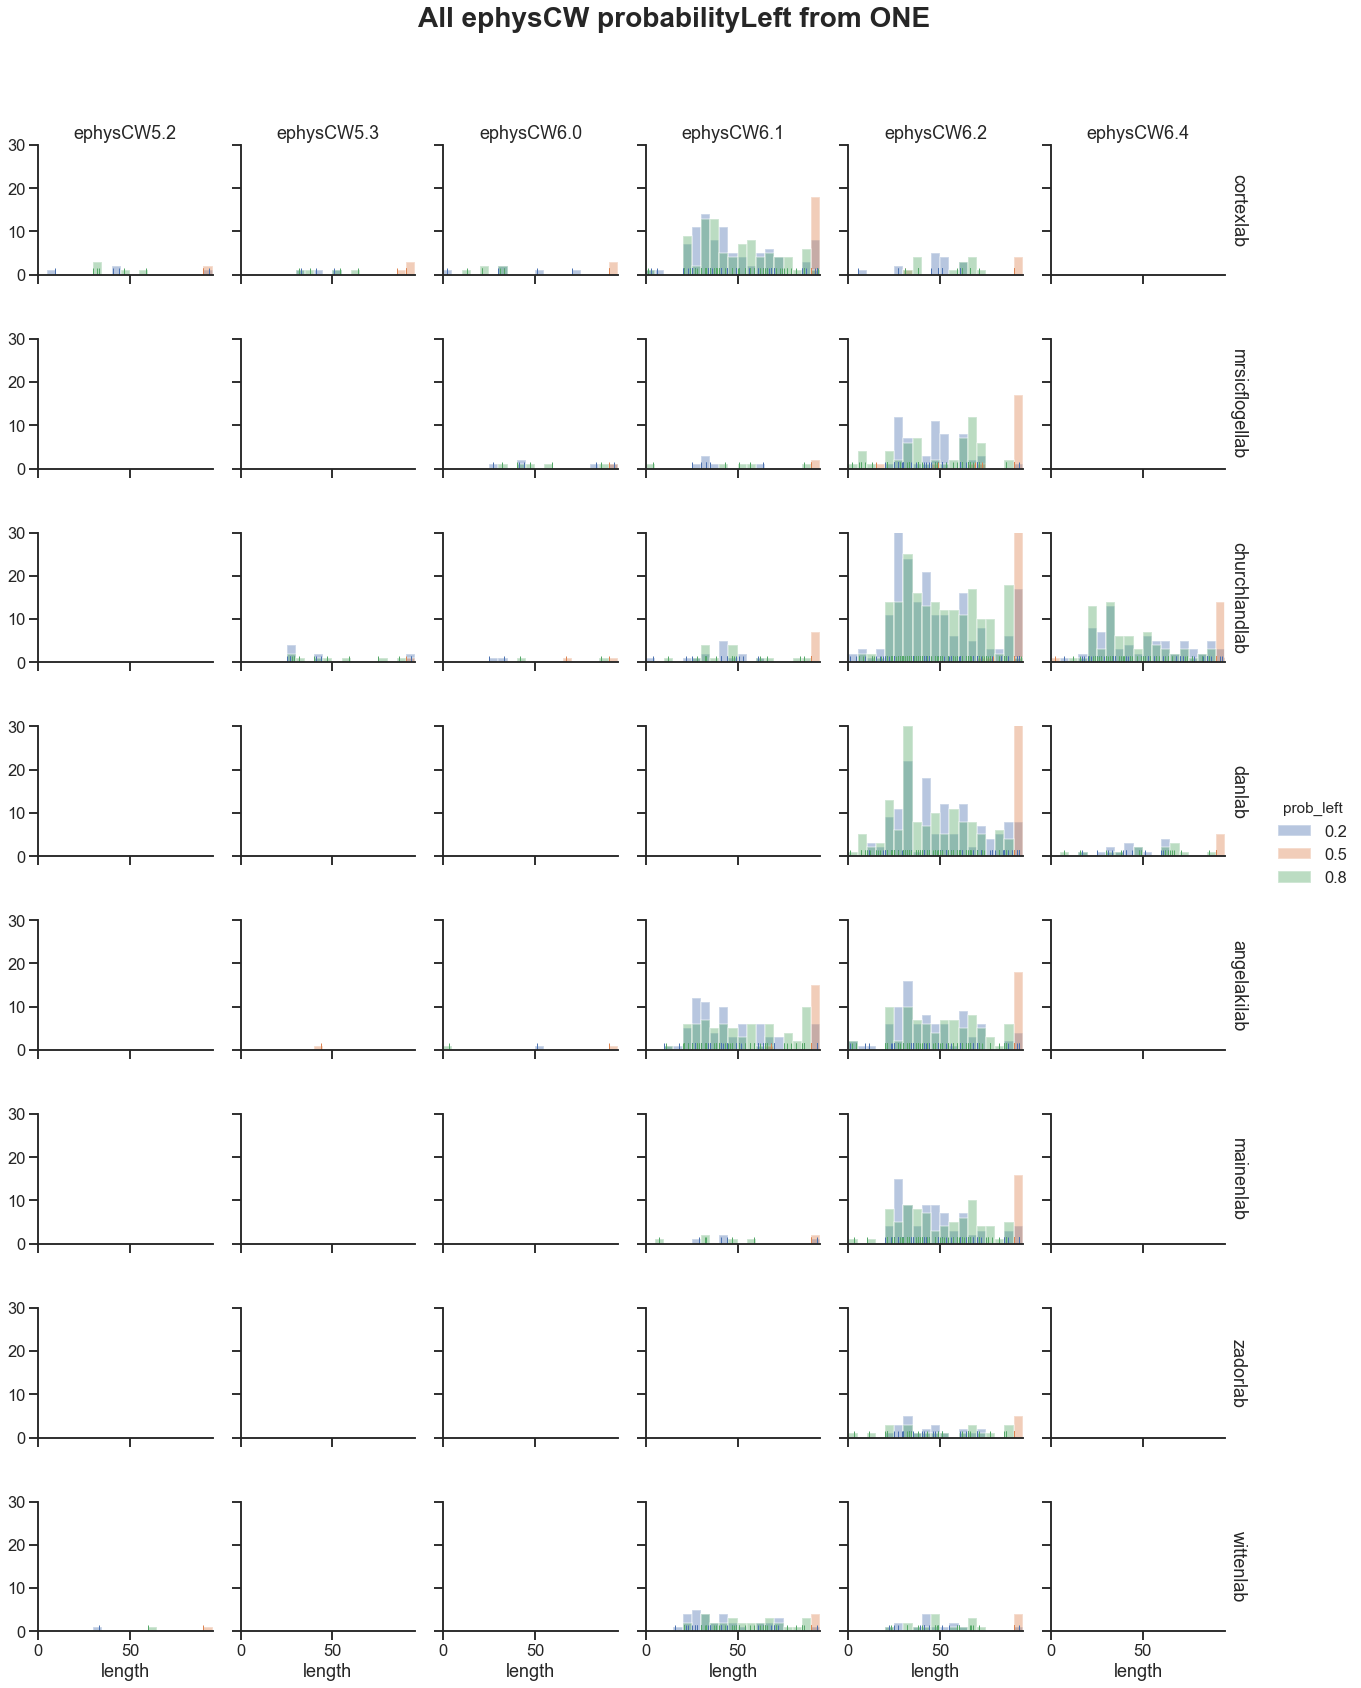

In [19]:
## make a big overview
g = sns.FacetGrid(df2, row="session_lab", col='task', 
                  col_order=sorted(df2.task.unique()), hue="prob_left", ylim=[0,30], xlim=[0,95], margin_titles=True)
g.map(sns.distplot, "length", rug=True, kde=False, hist=True, bins=np.arange(0, 100, 5)).add_legend()
[plt.setp(ax.texts, text="") for ax in g.axes.flat] # to clean margin titles on the right
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('All ephysCW probabilityLeft from ONE', fontsize=28, weight='bold')

In [20]:
# make a list of all sessions that have blocks with length 1 to patch
df2.loc[df2.length < 5, :].sort_values(by='session_start_time')

prob_left  length     session_lab                        task_protocol  \
2         0.8       3     angelakilab  _iblrig_tasks_ephysChoiceWorld6.0.3   
6         0.2       2       cortexlab  _iblrig_tasks_ephysChoiceWorld6.0.3   
4         0.2       4   churchlandlab  _iblrig_tasks_ephysChoiceWorld6.1.3   
2         0.8       4  mrsicflogellab  _iblrig_tasks_ephysChoiceWorld6.1.3   
11        0.8       1       cortexlab  _iblrig_tasks_ephysChoiceWorld6.1.3   
12        0.2       3       cortexlab  _iblrig_tasks_ephysChoiceWorld6.1.3   
3         0.8       2  mrsicflogellab  _iblrig_tasks_ephysChoiceWorld6.2.4   
14        0.8       3        zadorlab  _iblrig_tasks_ephysChoiceWorld6.2.5   
9         0.8       3       mainenlab  _iblrig_tasks_ephysChoiceWorld6.2.5   
7         0.2       4   churchlandlab  _iblrig_tasks_ephysChoiceWorld6.2.5   
8         0.2       1     angelakilab  _iblrig_tasks_ephysChoiceWorld6.2.5   
13        0.2       4     angelakilab  _iblrig_tasks_ephysChoiceWorld6.2.5   
14        0.8       4     angelakilab  _iblrig_tasks_ephysChoiceWorld6.2.5   
4         0.8       2     angelakilab  _iblrig_tasks_ephysChoiceWorld6.2.5   
15        0.2       1   churchlandlab  _iblrig_tasks_ephysChoiceWorld6.2.5   
7         0.8       1          danlab  _iblrig_tasks_ephysChoiceWorld6.2.5   
0         0.5       2   churchlandlab  _iblrig_tasks_ephysChoiceWorld6.4.0   

    session_start_time        task  
2  2019-10-04 17:28:50  ephysCW6.0  
6  2019-10-12 16:26:29  ephysCW6.0  
4  2019-11-26 14:04:09  ephysCW6.1  
2  2019-11-26 17:57:15  ephysCW6.1  
11 2019-12-06 12:14:53  ephysCW6.1  
12 2019-12-08 20:01:23  ephysCW6.1  
3  2019-12-10 18:32:56  ephysCW6.2  
14 2020-01-16 15:53:22  ephysCW6.2  
9  2020-01-21 10:44:49  ephysCW6.2  
7  2020-01-22 08:28:49  ephysCW6.2  
8  2020-01-24 14:22:03  ephysCW6.2  
13 2020-01-30 10:58:10  ephysCW6.2  
14 2020-02-17 15:55:29  ephysCW6.2  
4  2020-02-19 15:08:36  ephysCW6.2  
15 2020-02-21 13:24:45  ephysCW6.2  
7  2020-03-06 13:13:21  ephysCW6.2  
0  2020-03-14 13:07:02  ephysCW6.4

## redo in DJ, but only approved sessions

In [ ]:
eids = ['01864d6f-31e8-49c9-aadd-2e5021ea0ee7',
 '6713a4a7-faed-4df2-acab-ee4e63326f8d',
 'dd0faa76-4f49-428c-9507-6de7382a5d9e',
 '266a0360-ea0a-4580-8f6a-fe5bad9ed17c',
 '56956777-dca5-468c-87cb-78150432cc57',
 'b52182e7-39f6-4914-9717-136db589706e',
 '2d5f6d81-38c4-4bdc-ac3c-302ea4d5f46e',
 '1538493d-226a-46f7-b428-59ce5f43f0f9',
 '3ce452b3-57b4-40c9-885d-1b814036e936',
 '931a70ae-90ee-448e-bedb-9d41f3eda647',
 '02fbb6da-3034-47d6-a61b-7d06c796a830',
 '097ba865-f424-49a3-96fb-863506fac3e0',
 '097afc11-4214-4879-bd7a-643a4d16396e',
 '115d264b-1939-4b8e-9d17-4ed8dfc4fadd',
 '202128f9-02af-4c6c-b6ce-25740e6ba8cd',
 'cb2ad999-a6cb-42ff-bf71-1774c57e5308',
 '12dc8b34-b18e-4cdd-90a9-da134a9be79c',
 'c8e60637-de79-4334-8daf-d35f18070c29',
 '74bae29c-f614-4abe-8066-c4d83d7da143',
 '56d38157-bb5a-4561-ab5c-3df05a5d6e28',
 '6364ff7f-6471-415a-ab9e-632a12052690',
 '7be8fec4-406b-4e74-8548-d2885dcc3d5e',
 '9931191e-8056-4adc-a410-a4a93487423f',
 'af74b29d-a671-4c22-a5e8-1e3d27e362f3',
 'ded7c877-49cf-46ad-b726-741f1cf34cef',
 '0cbeae00-e229-4b7d-bdcc-1b0569d7e0c3',
 'fb7b21c9-b50e-4145-9254-a91a50d656ca',
 'ecb5520d-1358-434c-95ec-93687ecd1396',
 'ab583ab8-08bd-4ebc-a0b8-5d40af551068',
 'd42bb88e-add2-414d-a60a-a3efd66acd2a',
 '79de526f-aed6-4106-8c26-5dfdfa50ce86',
 'c90cdfa0-2945-4f68-8351-cb964c258725',
 '572a95d1-39ca-42e1-8424-5c9ffcb2df87',
 '8435e122-c0a4-4bea-a322-e08e8038478f',
 'bc9ea019-b560-4435-ab53-780d9276f15c',
 'da926936-9383-463a-8722-fd89e50b6941',
 '38d95489-2e82-412a-8c1a-c5377b5f1555',
 'c607c5da-534e-4f30-97b3-b1d3e904e9fd',
 '849c9acb-8223-4e09-8cb1-95004b452baf',
 '9ac2be3b-6e0b-4f49-b8bf-82344d9f5e67',
 'f64128ad-e201-4cbc-a839-85565804a89b',
 '1120797f-c2b0-4c09-b6ea-2555d69cb7ee',
 '034e726f-b35f-41e0-8d6c-a22cc32391fb',
 'dfd8e7df-dc51-4589-b6ca-7baccfeb94b4',
 'fa704052-147e-46f6-b190-a65b837e605e',
 '46794e05-3f6a-4d35-afb3-9165091a5a74',
 'ff4187b5-4176-4e39-8894-53a24b7cf36b',
 '465c44bd-2e67-4112-977b-36e1ac7e3f8c',
 'e49d8ee7-24b9-416a-9d04-9be33b655f40',
 'f8d5c8b0-b931-4151-b86c-c471e2e80e5d',
 '5b266a92-49d9-4376-a9f8-46a25b1c9655',
 '4153bd83-2168-4bd4-a15c-f7e82f3f73fb',
 'c6d5cea7-e1c4-48e1-8898-78e039fabf2b',
 '9f1b915b-d437-4426-8dcc-1124538069e8',
 '2199306e-488a-40ab-93cb-2d2264775578',
 '7bee9f09-a238-42cf-b499-f51f765c6ded',
 '36280321-555b-446d-9b7d-c2e17991e090',
 '1c213d82-32c3-49f7-92ca-06e28907e1b4',
 '741979ce-3f10-443a-8526-2275620c8473',
 'cf43dbb1-6992-40ec-a5f9-e8e838d0f643',
 '85dc2ebd-8aaf-46b0-9284-a197aee8b16f',
 '5386aba9-9b97-4557-abcd-abc2da66b863',
 '83e77b4b-dfa0-4af9-968b-7ea0c7a0c7e4',
 '4b00df29-3769-43be-bb40-128b1cba6d35',
 'd2f5a130-b981-4546-8858-c94ae1da75ff',
 '720a3fe6-5dfc-4a23-84f0-2f0b08e10ec2',
 '57b5ae8f-d446-4161-b439-b191c5e3e77b',
 '37e96d0b-5b4b-4c6e-9b29-7edbdc94bbd0',
 'a71175be-d1fd-47a3-aa93-b830ea3634a1',
 '57fd2325-67f4-4d45-9907-29e77d3043d7',
 '371a8256-3a13-44fd-86de-0971409d4891',
 '4b45eaac-d139-432d-8ae3-a88b8cfe90d7',
 'd33baf74-263c-4b37-a0d0-b79dcb80a764',
 '259927fd-7563-4b03-bc5d-17b4d0fa7a55',
 '510b1a50-825d-44ce-86f6-9678f5396e02',
 '193fe7a8-4eb5-4f3e-815a-0c45864ddd77']

In [ ]:
# get all ephysCW sessions - avoid laserEphysChoiceWorld
sess = acquisition.Session & 'task_protocol LIKE "_iblrig_tasks_ephysChoiceWorld%"'
b = sess * behavior.TrialSet.Trial
b = b.proj('session_lab', 'task_protocol', 'trial_stim_prob_left')
df = b.fetch(format='frame').reset_index()# count the number of trials in each sequence

block_lenghts = []
for name, group in df.groupby(['session_lab', 'task_protocol', 'session_start_time']):
    run_lengths = pd.DataFrame(run_length(group.trial_stim_prob_left))
    tmp_df = pd.DataFrame({'prob_left':run_lengths[0].values, 'length':run_lengths[1].values})
    tmp_df['session_lab'] = name[0]
    tmp_df['task_protocol'] = name[1]
    tmp_df['session_start_time'] = name[2]
    block_lenghts.append(tmp_df)
    